In [ ]:
pip install mlxtend --upgrade --no-deps

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import csv

# Apriori On chess

In [ ]:
acc_list_of_arrays=[]
with open('/content/chess.dat', 'r') as file:
    dataset = csv.reader(file, delimiter=' ')
    for row in dataset:
        temp=[element for element in row]
        temp= temp[:-1]
        acc_list_of_arrays.append(temp)

In [ ]:

apc_times = list()
apc_elements = list()
minsupport = .6
while minsupport <=1:
  start = time.process_time()
  te = TransactionEncoder()
  te_ary = te.fit(acc_list_of_arrays).transform(acc_list_of_arrays)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  result= apriori(df, min_support= minsupport, use_colnames=True)
  apc_elements.append(minsupport)
  end = time.process_time()
  apc_times.append(end-start)
  print (result)
  # total time taken
  print(f"Runtime of the program is {end - start}")
  minsupport +=.05

         support                                           itemsets
0       0.666145                                               (11)
1       0.633917                                               (15)
2       0.782228                                               (17)
3       0.619524                                               (19)
4       0.696183                                               (21)
...          ...                                                ...
254939  0.600125  (58, 29, 66, 62, 60, 52, 48, 40, 9, 34, 5, 56,...
254940  0.607009  (58, 29, 66, 62, 60, 52, 48, 40, 7, 9, 34, 56,...
254941  0.601377  (58, 29, 66, 62, 60, 52, 40, 7, 9, 34, 5, 56, ...
254942  0.611702  (58, 29, 66, 62, 60, 52, 48, 40, 7, 42, 34, 5,...
254943  0.635795  (58, 29, 66, 62, 60, 52, 48, 40, 7, 9, 34, 5, ...

[254944 rows x 2 columns]
Runtime of the program is 33.803436774
         support                                           itemsets
0       0.666145                                  

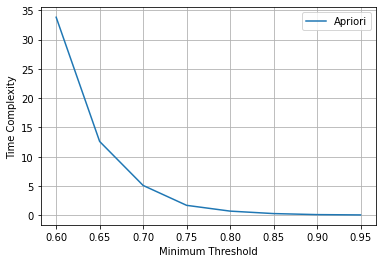

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apc_elements, apc_times, label ='Apriori')
plt.grid()
plt.legend()
plt.savefig('AprioriChess.pdf',bbox_inches='tight')
plt.show()


# FP-Growth on Chess

In [ ]:
acc_list_of_arrays=[]
with open('/content/chess.dat', 'r') as file:
    dataset = csv.reader(file, delimiter=' ')
    for row in dataset:
        temp=[element for element in row]
        acc_list_of_arrays.append(temp)

In [ ]:

fpc_times = list()
fpc_elements = list()
minsupport = .6
while minsupport <=1:
  start = time.process_time()
  te = TransactionEncoder()
  te_ary = te.fit(acc_list_of_arrays).transform(acc_list_of_arrays)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  result= fpgrowth(df, min_support= minsupport, use_colnames=True)
  fpc_elements.append(minsupport)
  end = time.process_time()
  fpc_times.append(end-start)
  print (result)
  # total time taken
  print(f"Runtime of the program is {end - start}")
  minsupport +=.05

         support               itemsets
0       1.000000                     ()
1       0.999687                   (58)
2       0.996558                   (52)
3       0.995307                   (29)
4       0.991865                   (40)
...          ...                    ...
509884  0.600751     (, 58, 62, 40, 50)
509885  0.600751      (, 58, 62, 7, 50)
509886  0.600751      (, 62, 40, 7, 50)
509887  0.600751    (58, 62, 40, 7, 50)
509888  0.600751  (, 58, 62, 40, 7, 50)

[509889 rows x 2 columns]
Runtime of the program is 10.561952008999995
         support        itemsets
0       1.000000              ()
1       0.999687            (58)
2       0.996558            (52)
3       0.995307            (29)
4       0.991865            (40)
...          ...             ...
222474  0.653630      (, 11, 60)
222475  0.653317    (58, 11, 60)
222476  0.650188    (52, 11, 60)
222477  0.653317  (, 58, 11, 60)
222478  0.650188  (, 52, 11, 60)

[222479 rows x 2 columns]
Runtime of the program is

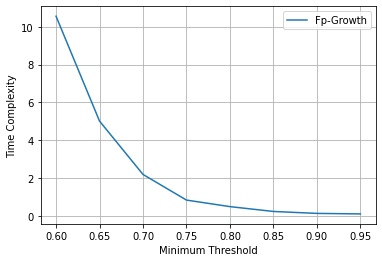

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(fpc_elements, fpc_times, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('FpgrowthChess.pdf',bbox_inches='tight')
plt.show()


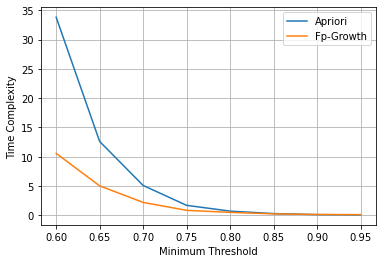

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apc_elements, apc_times, label ='Apriori')
plt.plot(fpc_elements, fpc_times, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('chesscombine.pdf',bbox_inches='tight')
plt.show()





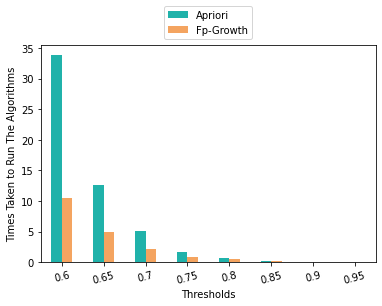

In [ ]:
data={"Apriori":apc_times,"Fp-Growth":fpc_times}
index = [0.6,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
dataFrame = pd.DataFrame(data=data, index=index);


my_colors = ['lightseagreen','sandybrown']
# Draw a vertical bar chart

dataFrame.plot.bar(rot=15,color=my_colors);
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.ylabel("Times Taken to Run The Algorithms")
plt.xlabel("Thresholds")
plt.savefig('Chess.pdf',bbox_inches='tight')

plt.show(block=True);

In [ ]:
apc_times

[33.803436774,
 12.591401212999997,
 5.0827095110000045,
 1.6859994090000043,
 0.7001121569999995,
 0.27906760900000194,
 0.10280579499999476,
 0.0510999129999945]

In [ ]:
fpc_times

[10.561952008999995,
 5.013153832,
 2.188415486000011,
 0.8316998959999893,
 0.48558952899999497,
 0.22955180600000347,
 0.12701516099998855,
 0.09963301499999488]

# Apriori on Kosarak

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules,fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import csv

In [ ]:
acc_list_of_arrays=[]
with open('/content/kosarak.dat', 'r') as file:
    dataset = csv.reader(file, delimiter=' ')
    for row in dataset:
        temp=[element for element in row]
        #temp= temp[:-1]
        acc_list_of_arrays.append(temp)

In [ ]:
del acc_list_of_arrays[100000:]

In [ ]:

apk_times = list()
apk_elements = list()
minsupport = .1
while minsupport <=.5:
  start = time.process_time()
  te = TransactionEncoder()
  te_ary = te.fit(acc_list_of_arrays).transform(acc_list_of_arrays)
  df = pd.DataFrame(te_ary, columns=te.columns_)

  result= apriori(df, min_support= minsupport, use_colnames=True)
  apk_elements.append(minsupport)
  end = time.process_time()
  apk_times.append(end-start)
  print (result)
  # total time taken
  print(f"Runtime of the program is {end - start}")
  minsupport +=.1

   support    itemsets
0  0.19860         (1)
1  0.36525        (11)
2  0.45682         (3)
3  0.60690         (6)
4  0.13310      (6, 1)
5  0.16210     (11, 3)
6  0.32517     (6, 11)
7  0.26852      (6, 3)
8  0.14415  (6, 11, 3)
Runtime of the program is 2.942091855000001
   support itemsets
0  0.36525     (11)
1  0.45682      (3)
2  0.60690      (6)
3  0.32517  (6, 11)
4  0.26852   (6, 3)
Runtime of the program is 2.8954853660000026
   support itemsets
0  0.36525     (11)
1  0.45682      (3)
2  0.60690      (6)
3  0.32517  (6, 11)
Runtime of the program is 2.884272203999984
   support itemsets
0  0.45682      (3)
1  0.60690      (6)
Runtime of the program is 2.8745537270000057
   support itemsets
0   0.6069      (6)
Runtime of the program is 2.834903075999989


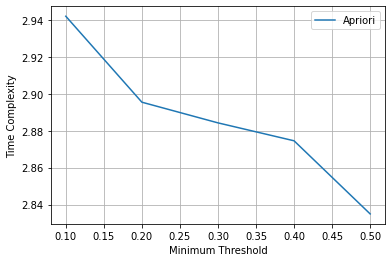

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apk_elements, apk_times, label ='Apriori')
plt.grid()
plt.legend()
plt.savefig('Apriorikosarak.pdf',bbox_inches='tight')
plt.show()


# FP-Growth on Kosarak

In [ ]:
acc_list_of_arrays=[]
with open('/content/kosarak.dat', 'r') as file:
    dataset = csv.reader(file, delimiter=' ')
    for row in dataset:
        temp=[element for element in row]
        acc_list_of_arrays.append(temp)

In [ ]:
del acc_list_of_arrays[100000:]

In [ ]:

fpk_times = list()
fpk_elements = list()
minsupport = .1
while minsupport <=.5:

  te = TransactionEncoder()
  te_ary = te.fit(acc_list_of_arrays).transform(acc_list_of_arrays)
  df = pd.DataFrame(te_ary, columns=te.columns_)
  start = time.process_time()
  result= fpgrowth(df, min_support= minsupport, use_colnames=True)
  fpk_elements.append(minsupport)
  end = time.process_time()
  fpk_times.append(end-start)
  print (result)
  # total time taken
  print(f"Runtime of the program is {end - start}")
  minsupport +=.1

   support    itemsets
0  0.45682         (3)
1  0.19860         (1)
2  0.60690         (6)
3  0.36525        (11)
4  0.26852      (6, 3)
5  0.13310      (6, 1)
6  0.32517     (6, 11)
7  0.16210     (11, 3)
8  0.14415  (6, 11, 3)
Runtime of the program is 3.239374801999986
   support itemsets
0  0.45682      (3)
1  0.60690      (6)
2  0.36525     (11)
3  0.26852   (6, 3)
4  0.32517  (6, 11)
Runtime of the program is 3.1805563000000063
   support itemsets
0  0.45682      (3)
1  0.60690      (6)
2  0.36525     (11)
3  0.32517  (6, 11)
Runtime of the program is 3.1785961430000214
   support itemsets
0  0.45682      (3)
1  0.60690      (6)
Runtime of the program is 3.17373386700001
   support itemsets
0   0.6069      (6)
Runtime of the program is 3.1299930559999893


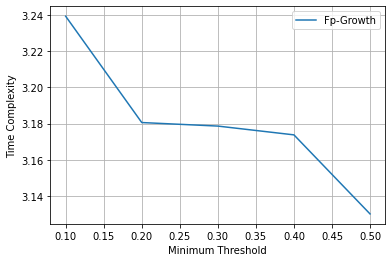

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(fpk_elements, fpk_times, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('fpgrowthkosarak.pdf',bbox_inches='tight')
plt.show()


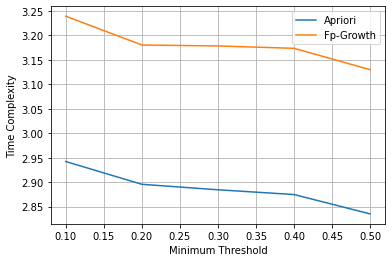

In [ ]:
plt.xlabel('Minimum Threshold')
plt.ylabel('Time Complexity')
plt.plot(apk_elements, apk_times, label ='Apriori')
plt.plot(fpk_elements, fpk_times, label ='Fp-Growth')
plt.grid()
plt.legend()
plt.savefig('kosarakcombine.pdf',bbox_inches='tight')
plt.show()

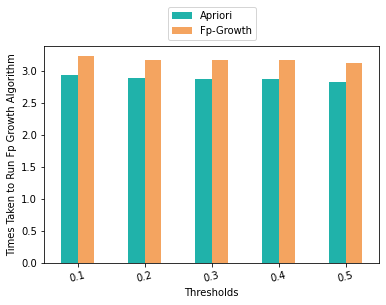

In [ ]:
data={"Apriori":apk_times,"Fp-Growth":fpk_times}
index = [0.1,0.2,0.3,0.4,0.5]
dataFrame = pd.DataFrame(data=data, index=index);


my_colors = ['lightseagreen','sandybrown']
# Draw a vertical bar chart

dataFrame.plot.bar(rot=15,color=my_colors);
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.ylabel("Times Taken to Run Fp Growth Algorithm")
plt.xlabel("Thresholds")
plt.savefig('Kosarak.pdf',bbox_inches='tight')

plt.show(block=True);